## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 8
---------------------------------------

GOALS:

1. Load data into Python that you find online
2. Understand data types and fix some errors
3. Find your own data to play with

----------------------------------------------------------

This homework has **5 questions** and **1 problem**.

NOTE: Be kind to yourself. Working with data can be hard! Every data set is different. **Seriously** come get help! Come to lab!


In [63]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Try reading in some data - csv

Go to the [Cal Fire Website](https://www.fire.ca.gov/incidents) and scroll to the bottom to see the Incident Data. We will download the file named **ALL DATA AS CSV** this should put the data file into your Downloads folder. 

Next you need to move the file **mapdataall.csv** from your Downloads folder into your Day8 folder where you are doing your homework. You can open your Downloads folder and drag the file into JupyterLab side bar. Then I can run the command

    DF_raw = pd.read_csv('mapdataall.csv')

to load the data and look at the data frame.

In [64]:
DF = pd.read_csv('mapdataall.csv')
show(DF)

## **Q1:** How many variables and observations?

In [65]:
DF.shape

# 2762 observations and 23 variables, as is displayed below

(2762, 23)

## **Q2:** How many different incident types are there?

In [66]:
list(DF['incident_type'].unique())

 #4, as you can see here they're nan, (if that counts) wildfire, flood, and fire.

[nan, 'Wildfire', 'Flood', 'Fire']

## **Q3:** Make a histogram of the acres burned and color the bars by whether or not the incident was a calfire incident. You will probably need to make a mask to remove very small and very large fires. How many fires burned more than 100,000 acres? What is the largest fire in the data?

### **Q3a:** Make a histogram of the acres burned and color the bars by whether or not the incident was a calfire incident. You will probably need to make a mask to remove very small and very large fires. 

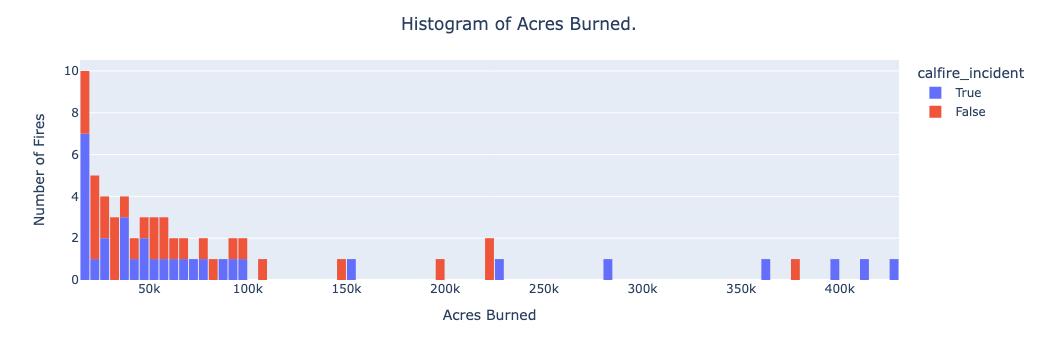

In [67]:
# this mask removes anything that isn't a fire, but I noticed that there were so many fires below 15000 that it made the rest
# of the data impossible to see, so I removed them all with the mask. There were also two fires that were huge and way far to the
# right which also made the data harder to see, which is why I removed those, too. Because I removed both of those fires, it made
# the two questions (How many fires burned more than 100,000 acres? What is the largest fire in the data?) have two answers:
# the answer including those two fires, and the answer after I apply the mask. I will answer both.
wild_fires_mask = (DF['incident_type'] == 'Wildfire') & (DF['incident_acres_burned'] > 15000) & (DF['incident_acres_burned'] < 500000)

DF_wildfires = DF[wild_fires_mask]

acres_burned = px.histogram(DF_wildfires,
                   nbins=100,
                   x='incident_acres_burned', # this sets x to the acres  burned
                   color = DF_wildfires['calfire_incident']) # makes the color change if its a calfire incident or not

acres_burned.update_layout(bargap=0.1,
                  title='Histogram of Acres Burned.',
                  title_x=0.5,
                  xaxis_title='Acres Burned',
                  yaxis_title='Number of Fires',
                 
                  
                  )
acres_burned.show()

In [ ]:
# Like I mentioned above, I removed the two biggest fires so I will answer the two questions with and without the final mask
# applied. 

### **Q3b:** How many fires burned more than 100,000 acres? What is the largest fire in the data?

In [68]:
# using the data that is on the histogram:

large_fires_masked_mask = (DF_wildfires['incident_acres_burned'] > 100000)
large_fires_masked = DF_wildfires[large_fires_masked_mask]
len(large_fires_masked)

# looks like there's thirteen fires in the masked list that burned above 100k acres

13

In [69]:
# next I do the exact same thing, but I replace the data frame I'm using with the origonal data (as opposed to the data that was
# used in the histogram that was masked

large_fires_raw_mask = (DF['incident_type'] == 'Wildfire') & (DF['incident_acres_burned'] > 100000) # made sure that it only used Wildfires
large_fires_raw_masked = DF[large_fires_raw_mask]
len(large_fires_raw_masked)

# looks like in the origonal data set theres 15

15

**Q3c:** What is the largest fire in the data?

In [70]:
# again, we'll do both the masked and unmasked data, starting like before with the masked data first

biggest_fire_masked_mask = (DF_wildfires['incident_acres_burned'] == DF_wildfires['incident_acres_burned'].max())
show(DF_wildfires[biggest_fire_masked_mask])

# looks like the biggest fire in the masked data was the "Park Fire," which is displayed below, with 429603 acres burned

In [9]:
# and now for the unmasked data, same thing but we replace the data frame it's masking

biggest_fire_raw_mask = (DF['incident_acres_burned'] == DF['incident_acres_burned'].max())
show(DF[biggest_fire_raw_mask])

# this time its the "August Complex (includes Doe Fire)" with 1032648 acres burned!

**Extra Q:** EXTRA - CHALLENGE - See if you can create a graph that answers the question: Are fires getting bigger or more frequent over time? You get complete creative control on how to answer this question!

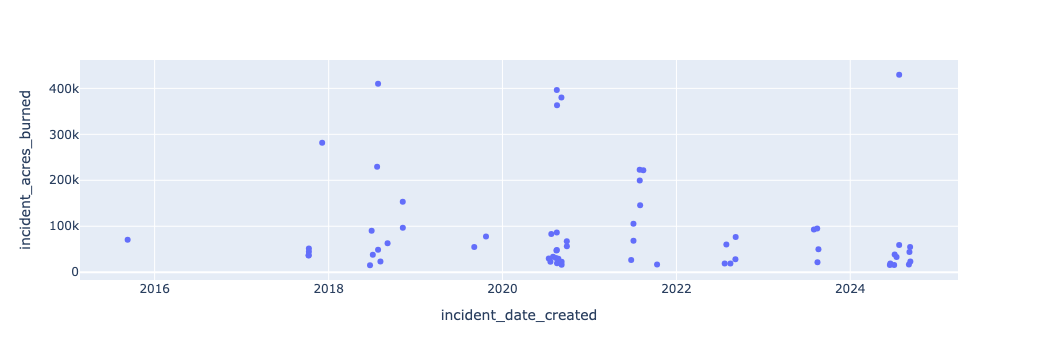

In [71]:
DF_chronological_order = DF.sort_values(by='incident_date_created',ascending=True)

fig = px.scatter(DF_wildfires,
                    x='incident_date_created',
                    y='incident_acres_burned'
                )
fig.show()

# as you can see below it doesn't look like there's a lot of coorilation between time of fire and the acres burned.

In [72]:
my_website = 'https://www.fire.ca.gov/incidents'

In [73]:
my_website = 'https://www.fire.ca.gov/incidents'
DF_active_fires = pd.read_html(my_website)

In [75]:
DF_active_fires

[Empty DataFrame
 Columns: [Incident, Counties, Started, Acres, Containment]
 Index: [],
     Icon                         Description
 0    NaN                     Active Incident
 1    NaN                  Contained Incident
 2    NaN            Fires Less than 10 Acres
 3    NaN                     Prescribed Fire
 4    NaN                            Mudslide
 5    NaN                               Flood
 6    NaN                          Earthquake
 7    NaN                  Lightning Activity
 8    NaN      Incident Perimeter Reference 1
 9    NaN        Evacuation Order Reference 2
 10   NaN      Evacuation Warning Reference 3
 11   NaN        Red Flag Warning Reference 4
 12   NaN     Smoke and Haze Forecast 0-3 PPM
 13   NaN    Smoke and Haze Forecast 3-25 PPM
 14   NaN   Smoke and Haze Forecast 25-63 PPM
 15   NaN  Smoke and Haze Forecast 63-158 PPM
 16   NaN    Smoke and Haze Forecast >158 PPM]

In [59]:
DF_active_fires[0]

,Incident,Counties,Started,Acres,Containment
0,Horseshoe Fire,Inyo,10/30/2024,4537,98%
1,Canyon Crest Fire,"Riverside, San Bernardino",11/28/2024,284,50%


## Try reading in some data from Wikipedia - html

Here we will explore academy award winning films. Go to the [Wiki for the List of Academy Award Winning Films](https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films). Look at what type of data is there. How many tables? Any weird looking data?

Now read the html data into Python and show the data in DF[0]

In [76]:
# Your code here
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
DF_films = pd.read_html(my_website)
DF_raw_films = DF_films[0]
show(DF_raw_films)
DF_raw_films['Year'] = DF_raw_films['Year'].apply(lambda x: int(x.split('/')[0]))

In [97]:
# Here is some helper code
# This is code that will read in the data and then fix the Year column
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
DF_films = pd.read_html(my_website)
DF_raw_films = DF_films[0]
DF_raw_films['Year'] = DF_raw_films['Year'].apply(lambda x: int(x.split('/')[0]))
DF_raw_films['Year'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})

,Year,count
0,1945,21
1,1949,20
2,1942,20
3,1950,19
4,1948,19
...,...,...
91,1931,10
92,1932,9
93,1928,7
94,1929,6


**Q4** Following along with the lecture notes or video, fix the data in the 'Awards' column.

In [98]:
# Your code here

awards_data = DF_raw_films['Awards'].value_counts()
DF_Awards = awards_data.reset_index().rename(columns={"index": "value", 0: "count"})
DF_raw_films['Awards'] = DF_raw_films['Awards'].apply(lambda x: x.split('(')[0])
DF_raw_films['Awards'] = DF_raw_films['Awards'].apply(lambda x: int(x))
DF_raw_films

,Film,Year,Awards,Nominations
0,Oppenheimer,2023,7,13
1,Poor Things,2023,4,11
2,The Zone of Interest,2023,2,5
3,American Fiction,2023,1,5
4,Anatomy of a Fall,2023,1,5
...,...,...,...,...
1368,The Yankee Doodle Mouse,1943,1,1
1369,The Yearling,1946,2,7
1370,"Yesterday, Today and Tomorrow (Ieri, oggi, dom...",1964,1,1
1371,You Can't Take It with You,1938,2,7


**Q5** Now try to fix the data in the "Nominations" column - see if you can do it without looking at the answer.

In [99]:
# Your code here
DF_raw_films['Nominations'] = DF_raw_films['Nominations'].apply(lambda x: x.split('[')[0])
DF_raw_films['Nominations'] = DF_raw_films['Nominations'].apply(lambda x: int(x))
DF_raw_films

,Film,Year,Awards,Nominations
0,Oppenheimer,2023,7,13
1,Poor Things,2023,4,11
2,The Zone of Interest,2023,2,5
3,American Fiction,2023,1,5
4,Anatomy of a Fall,2023,1,5
...,...,...,...,...
1368,The Yankee Doodle Mouse,1943,1,1
1369,The Yearling,1946,2,7
1370,"Yesterday, Today and Tomorrow (Ieri, oggi, dom...",1964,1,1
1371,You Can't Take It with You,1938,2,7


## Problem 1

Your homework today will be to see if you can find some data of your own. This can be the first steps you take toward your final project. 

You should:

* Find some data online
* Read that data into Python using the Pandas commands we learned
* Look at the DataFrame - number of variables, number of observations, AND the dtypes. Comment on what you see.
* Try to do summary statistics (.describe()). Does it work like expected?
* Attempt to fix any data, or explain why the data does not need to be fixed.
* Make some sort of graph using columns in your data.

In [217]:
DF_new = pd.read_csv('MoviesOnStreamingPlatforms.csv')

# Rotten Tomatoes is displayed as x/100, however I'd like it to instead be an integer between 1 and 100 as to properly represent
# what it looks like on the rotten tomatoes website

mask = DF_new['Rotten Tomatoes'].notna()
DF_new= DF_new[mask]
DF_new['Rotten Tomatoes'] = DF_new['Rotten Tomatoes'].apply(lambda x: str(x))
DF_new['Rotten Tomatoes'] = DF_new['Rotten Tomatoes'].apply(lambda x: x.split('/')[0])
DF_new['Rotten Tomatoes'] = DF_new['Rotten Tomatoes'].apply(lambda x: int(x))

# Converting all of the variables that are just 0 or 1 anyway into booleans
DF_new['Netflix'] = DF_new['Netflix'].apply(lambda x: bool(x))
DF_new['Hulu'] = DF_new['Hulu'].apply(lambda x: bool(x))
DF_new['Prime Video'] = DF_new['Prime Video'].apply(lambda x: bool(x))
DF_new['Disney+'] = DF_new['Disney+'].apply(lambda x: bool(x))
DF_new['Type'] = DF_new['Type'].apply(lambda x: bool(x))